# Imports y folder base





In [ ]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
import IPython.display as ipd
import soundfile as sf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
usr_folder = r'/content/drive/MyDrive/Big Data/Datamining/Practica/2025_Datasets_Datamining' # Albert


In [ ]:
usr_folder = r'/content/drive/MyDrive/Master/Data Mining/Prácticas Data Mining/2025_Datasets_Datamining' # Wenjie

# Cargar los datos

In [ ]:
base_folder = usr_folder + '/dataset_lite/Train'
output_folder = usr_folder +  '/dataset_lite/Output'

def load_audio(input_folder, output_folder):
    data = []

    for ship_folder in os.listdir(input_folder): # Se accede a cada carpeta de los 4 barcos (Tug, Tanker, Passengership, Cargo)
        ship_folder_path = os.path.join(input_folder, ship_folder)
        if os.path.isdir(ship_folder_path): # Se comprueba que el path es correcto
            metadata_path = os.path.join(ship_folder_path, ship_folder.lower() + "-metafile.txt")
            if os.path.exists(metadata_path):
                with open(metadata_path, "r", encoding="utf-8") as archivo: # Se saca el archivo de metadatos
                    metadata_file = archivo.read()

            for date_folder in os.listdir(ship_folder_path): # Se accede a cada dato registrado con fechas dentro de cada barco
                date = date_folder.split("-")[0] # De 20171106a-5 → 2017106a
                date = re.sub(r'[^0-9]', '', date)  # Elimina cualquier letra
                date_folder_path = os.path.join(ship_folder_path, date_folder)
                if os.path.isdir(date_folder_path):

                    for audio_file in os.listdir(date_folder_path): # Se accede a los 5 audios de 4 segundos que hay en las carpetas de datos de las fechas
                        #print(audio_file)
                        if audio_file.endswith(".wav"):
                            audio_path = os.path.join(date_folder_path, audio_file)

                            data.append([ship_folder, audio_path, date, metadata_path]) # Agregar datos al DataFrame
    return pd.DataFrame(data, columns=["ship", "audio_path", "date", "metadata_path"]) # Crear el DataFrame

In [ ]:
df = load_audio(base_folder, output_folder)

In [ ]:
df.tail(10)

,ship,audio_path,date,metadata_path
2807,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171214,/content/drive/MyDrive/Master/Data Mining/Prá...
2808,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171214,/content/drive/MyDrive/Master/Data Mining/Prá...
2809,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171214,/content/drive/MyDrive/Master/Data Mining/Prá...
2810,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171214,/content/drive/MyDrive/Master/Data Mining/Prá...
2811,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171214,/content/drive/MyDrive/Master/Data Mining/Prá...
2812,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171215,/content/drive/MyDrive/Master/Data Mining/Prá...
2813,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171215,/content/drive/MyDrive/Master/Data Mining/Prá...
2814,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171215,/content/drive/MyDrive/Master/Data Mining/Prá...
2815,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171215,/content/drive/MyDrive/Master/Data Mining/Prá...
2816,Cargo,/content/drive/MyDrive/Master/Data Mining/Prá...,20171215,/content/drive/MyDrive/Master/Data Mining/Prá...


In [ ]:
df.value_counts('ship')

,count
ship,
Tanker,1088
Passengership,889
Cargo,520
Tug,320


<Axes: xlabel='ship', ylabel='count'>

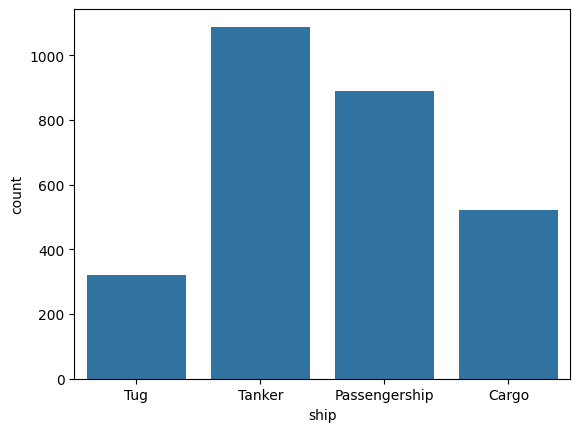

In [ ]:
import seaborn as sns
sns.countplot(x=df["ship"])

# Formas de audio, Espectogramas y Escoger frame and hop size

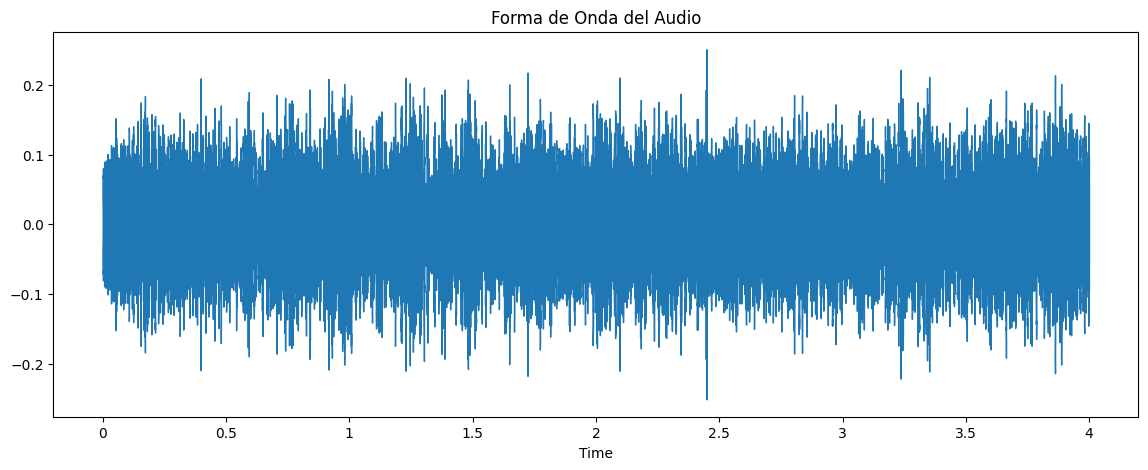

In [ ]:
y, sr = lb.load(df["audio_path"][5])

# Mostrar la forma de onda del audio
plt.figure(figsize=(14, 5))
lb.display.waveshow(y, sr=sr)
plt.title('Forma de Onda del Audio')
plt.show()

# Escuchar el audio
ipd.Audio(y, rate=sr)

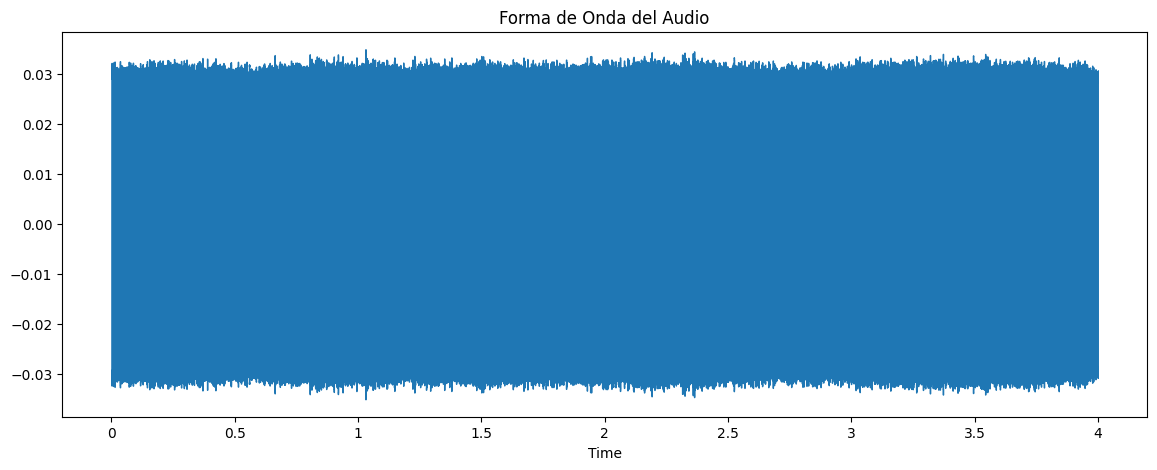

In [ ]:
y, sr = lb.load(df["audio_path"][23])

# Mostrar la forma de onda del audio
plt.figure(figsize=(14, 5))
lb.display.waveshow(y, sr=sr)
plt.title('Forma de Onda del Audio')
plt.show()

# Escuchar el audio
ipd.Audio(y, rate=sr)

In [ ]:
cargo = df[df["ship"] == "Cargo"]

In [ ]:
cargo["audio_path"][2297]

'/content/drive/MyDrive/Big Data/Datamining/Practica/2025_Datasets_Datamining/dataset_lite/Train/Cargo/20171107-5/5_2048000_2176000.wav'

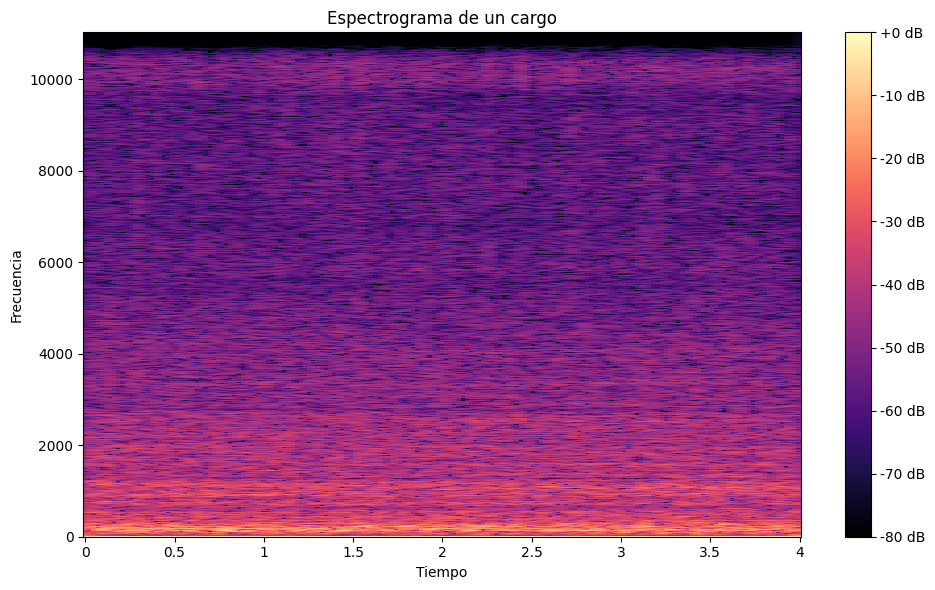

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa

# Cargar un archivo
y, sr = lb.load(cargo["audio_path"][2297])

# Configurar los parámetros del espectrograma
frame_size = 4096  # Tamaño de la ventana de análisis en muestras
hop_length = frame_size // 8  # Tamaño de la ventana de análisis en muestras
  # Desplazamiento entre ventanas en muestras

# Calcular el espectrograma usando la transformada de Fourier de tiempo corto (STFT)
D = np.abs(librosa.stft(y, n_fft=frame_size, hop_length=hop_length))

# Convertir a decibeles (escala logarítmica) con potencia 2
DB = librosa.amplitude_to_db(D, ref=np.max)

# Mostrar el espectrograma usando matplotlib
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de un cargo')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [ ]:
print(sr)

22050


In [ ]:
tug = df[df["ship"] == "Tug"]
tug

,ship,audio_path,date,metadata_path
0,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...
1,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...
2,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...
3,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...
4,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...
...,...,...,...,...
315,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171225,/content/drive/MyDrive/Big Data/Datamining/Pra...
316,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171225,/content/drive/MyDrive/Big Data/Datamining/Pra...
317,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171225,/content/drive/MyDrive/Big Data/Datamining/Pra...
318,Tug,/content/drive/MyDrive/Big Data/Datamining/Pra...,20171225,/content/drive/MyDrive/Big Data/Datamining/Pra...


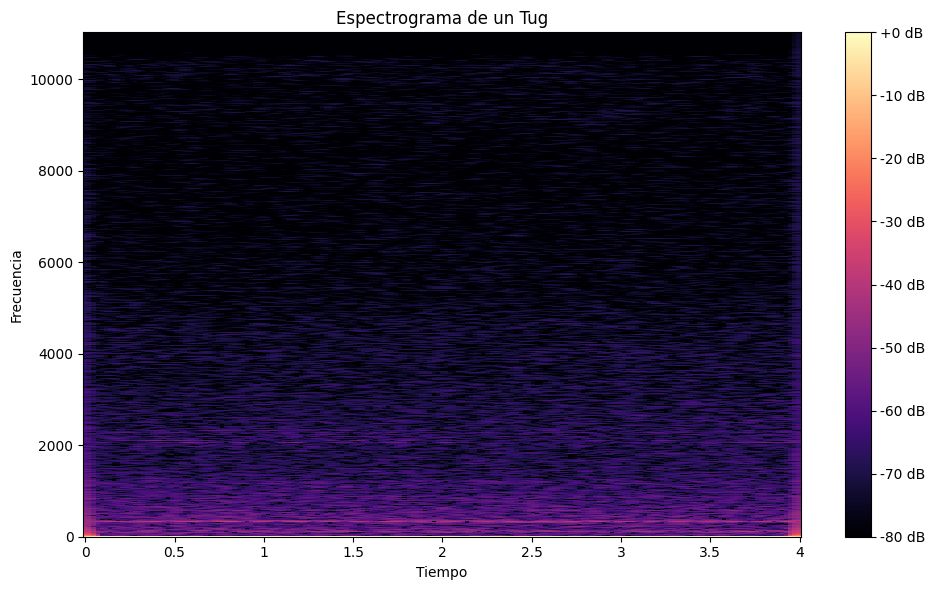

In [ ]:
# Cargar un archivo
y, sr = lb.load(tug["audio_path"][318])

# Configurar los parámetros del espectrograma
frame_size = 4096  # Tamaño de la ventana de análisis en muestras
hop_length = frame_size // 8  # Tamaño de la ventana de análisis en muestras
  # Desplazamiento entre ventanas en muestras

# Calcular el espectrograma usando la transformada de Fourier de tiempo corto (STFT)
D = np.abs(librosa.stft(y, n_fft=frame_size, hop_length=hop_length))

# Convertir a decibeles (escala logarítmica) con potencia 2
DB = librosa.amplitude_to_db(D, ref=np.max)

# Mostrar el espectrograma usando matplotlib
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de un Tug')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [ ]:
passengership = df[df["ship"] == "Passengership"]
passengership

,ship,audio_path,date,metadata_path
1408,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160506,/content/drive/MyDrive/Big Data/Datamining/Pra...
1409,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160506,/content/drive/MyDrive/Big Data/Datamining/Pra...
1410,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160506,/content/drive/MyDrive/Big Data/Datamining/Pra...
1411,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160506,/content/drive/MyDrive/Big Data/Datamining/Pra...
1412,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160506,/content/drive/MyDrive/Big Data/Datamining/Pra...
...,...,...,...,...
2292,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180922,/content/drive/MyDrive/Big Data/Datamining/Pra...
2293,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180922,/content/drive/MyDrive/Big Data/Datamining/Pra...
2294,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180922,/content/drive/MyDrive/Big Data/Datamining/Pra...
2295,Passengership,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180922,/content/drive/MyDrive/Big Data/Datamining/Pra...


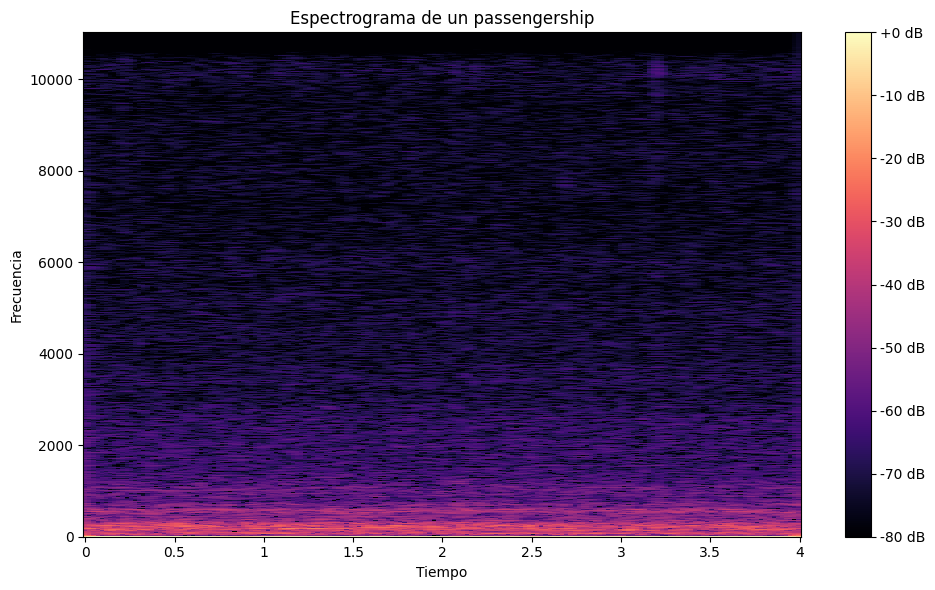

In [ ]:
# Cargar un archivo
y, sr = lb.load(passengership["audio_path"][1412])

# Configurar los parámetros del espectrograma
frame_size = 4096  # Tamaño de la ventana de análisis en muestras
hop_length = frame_size // 8  # Tamaño de la ventana de análisis en muestras
  # Desplazamiento entre ventanas en muestras

# Calcular el espectrograma usando la transformada de Fourier de tiempo corto (STFT)
D = np.abs(librosa.stft(y, n_fft=frame_size, hop_length=hop_length))

# Convertir a decibeles (escala logarítmica) con potencia 2
DB = librosa.amplitude_to_db(D, ref=np.max)

# Mostrar el espectrograma usando matplotlib
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de un passengership')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [ ]:
tanker = df[df["ship"] == "Tanker"]
tanker

,ship,audio_path,date,metadata_path
320,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160519,/content/drive/MyDrive/Big Data/Datamining/Pra...
321,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160519,/content/drive/MyDrive/Big Data/Datamining/Pra...
322,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160519,/content/drive/MyDrive/Big Data/Datamining/Pra...
323,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160519,/content/drive/MyDrive/Big Data/Datamining/Pra...
324,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20160519,/content/drive/MyDrive/Big Data/Datamining/Pra...
...,...,...,...,...
1403,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180822,/content/drive/MyDrive/Big Data/Datamining/Pra...
1404,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180822,/content/drive/MyDrive/Big Data/Datamining/Pra...
1405,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180822,/content/drive/MyDrive/Big Data/Datamining/Pra...
1406,Tanker,/content/drive/MyDrive/Big Data/Datamining/Pra...,20180822,/content/drive/MyDrive/Big Data/Datamining/Pra...


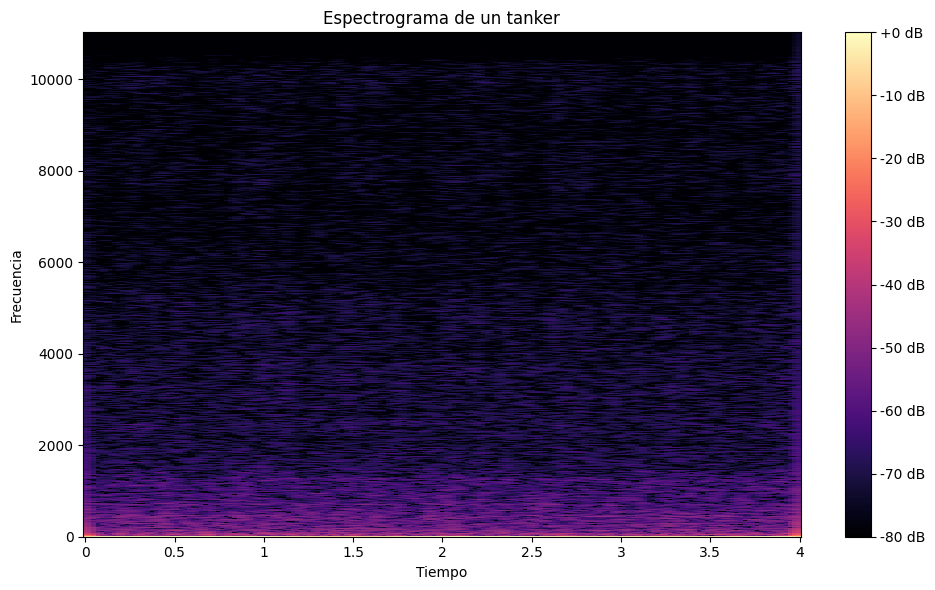

In [ ]:
# Cargar un archivo
y, sr = lb.load(df["audio_path"][324])

# Configurar los parámetros del espectrograma
frame_size = 4096  # Tamaño de la ventana de análisis en muestras
hop_length = frame_size // 8  # Tamaño de la ventana de análisis en muestras
  # Desplazamiento entre ventanas en muestras

# Calcular el espectrograma usando la transformada de Fourier de tiempo corto (STFT)
D = np.abs(librosa.stft(y, n_fft=frame_size, hop_length=hop_length))

# Convertir a decibeles (escala logarítmica) con potencia 2
DB = librosa.amplitude_to_db(D, ref=np.max)

# Mostrar el espectrograma usando matplotlib
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de un tanker')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

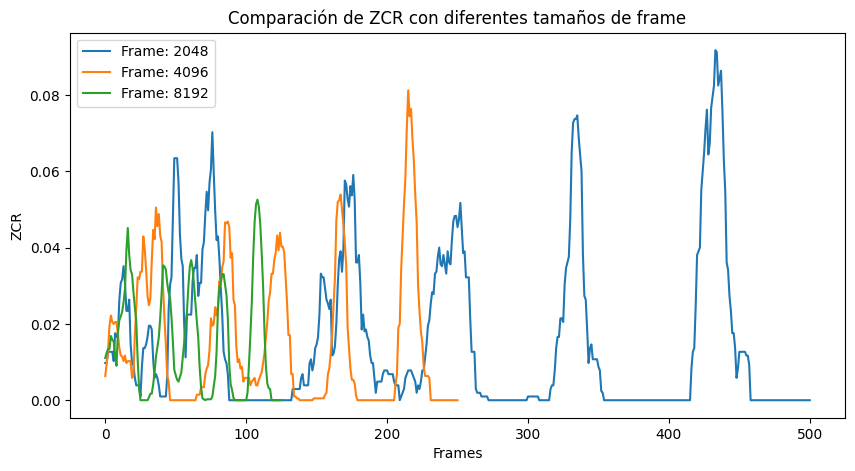

In [ ]:
# Cargar audio
y, sr = librosa.load(df["audio_path"][320], sr=None)
y = y - (min(y) + (max(y) - min(y)) / 2)  # Para situar el 0 en el medio del minimo y el maximo.

# Definir diferentes tamaños de ventana
frame_sizes = [4096//2, 4096, 4096*2]

plt.figure(figsize=(10, 5))

for frame_size in frame_sizes:
    hop_length = frame_size// 8
    zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_size, hop_length=hop_length)
    plt.plot(zcr[0], label=f"Frame: {frame_size}")
plt.xlabel("Frames")
plt.ylabel("ZCR")
plt.title("Comparación de ZCR con diferentes tamaños de frame")
plt.legend()
plt.show()

# Extraer Features

In [ ]:
print("Muestras por segundo = ", sr, "frames")
print("Muestras por audio = ", 4*sr, "frames\n")

FRAME_SIZE = 4096 # Muestras que tiene la ventana de audio analizada.
HOP_LENGTH = FRAME_SIZE // 8 # Muestras que se saltan de ventana en ventana.

print("HOP_LENGTH = ", HOP_LENGTH, "frames")
print("HOP_LENGTH = ", round(HOP_LENGTH/sr,3), "segundos\n")
print("FRAME_SIZE = ", FRAME_SIZE, "frames")
print("FRAME_SIZE = ", round(FRAME_SIZE/sr,3), "segundos")

Muestras por segundo =  22050 frames
Muestras por audio =  88200 frames

HOP_LENGTH =  512 frames
HOP_LENGTH =  0.023 segundos

FRAME_SIZE =  4096 frames
FRAME_SIZE =  0.186 segundos


In [ ]:
def amplitude_mean_max_values(signal, frame_size, hop_length):
    amplitude_values = []
    # Iteramos sobre la señal de audio. Desde 0 hasta su longitud con el paso definido por hop_length.
    for i in range(0, len(signal), hop_length):
        # De la señal tomamos una ventana de valores.
        # Empezando en el momento de tiempo "i" hasta "i" + la longitud de la ventana (frame_size)
        window = signal[i:i+frame_size]
        # Agregamos el valor máximo de esta ventana a la lista de valores de la amplitud
        amplitude_values.append(max(window))

    # Devolvemos la media de los valores de la envolvente de amplitud como indicativo de intensidad del canto.
    return np.mean(amplitude_values)

def root_mean_squared(signal, frame_size, hop_length):
    rms = []
    # Iteramos sobre la señal de audio. Desde 0 hasta su longitud con el paso definido por hop_length.
    for i in range(0, len(signal), hop_length):
        # Raíz de sumar los valores de la señal en esa ventana al cuadrado y dividirlo por el tamaño de la ventana.
        rms_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rms.append(rms_current_frame)
    return rms

def calcular_caracteristicas (y,sr,FRAME_SIZE,HOP_LENGTH):
  mfcc = lb.feature.mfcc(y=y, n_mfcc=13, sr=sr)
  #mfcc_scaled = np.mean(mfcc, axis=1)
  delta1_mfcc = lb.feature.delta(mfcc, mode='nearest')
  delta2_mfcc = lb.feature.delta(mfcc, mode='nearest', order=2)
  zcr = lb.feature.zero_crossing_rate(y=y)
  rms = root_mean_squared(y, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
  amplitude = amplitude_mean_max_values(y, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
  spectral_centroid = lb.feature.spectral_centroid(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
  spectral_flux = lb.onset.onset_strength(S=lb.feature.melspectrogram(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH))
  spectral_bandwidth = lb.feature.spectral_bandwidth(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

  #  print("mfcc", mfcc.shape)
  #  print("mfcc_scaled", mfcc_scaled.shape)
  #  print("delta1_mfcc", delta1_mfcc.shape)
  #  print("delta2_mfcc", delta2_mfcc.shape)
  # print("zcr", zcr.shape)
  # print("rms", rms.shape)
  # print("amplitude", amplitude.shape)
  # print("spectral_centroid", spectral_centroid.shape)
  # print("spectral_flux", spectral_flux.shape)

  return (zcr, rms, spectral_centroid, spectral_flux, spectral_bandwidth, mfcc, delta1_mfcc,delta2_mfcc)

In [ ]:
def extract_audio_features(df_1):
  # Declarar listas vacias para generar df nuevas
  zcr_list = []
  rms_list = []
  spectral_centroid_list = []
  spectral_flux_list = []
  spectral_bandwidth_list = []
  mfcc_list = []
  delta1_mfcc_list = []
  delta2_mfcc_list = []

  # Sacar features de cada fila.
  for index, row in df_1.iterrows():
    audio_path = row['audio_path']
    try:
      y, sr = lb.load(audio_path)
      y = y - (min(y) + (max(y) - min(y)) / 2) # Para situar el 0 en el medio del minimo y el maximo
      zcr, rms, spectral_centroid, spectral_flux, spectral_bandwidth, mfcc, delta1_mfcc,delta2_mfcc = calcular_caracteristicas(y, sr, FRAME_SIZE,HOP_LENGTH)
      zcr_list.append(zcr)
      rms_list.append(rms)
      spectral_centroid_list.append(spectral_centroid)
      spectral_flux_list.append(spectral_flux)
      spectral_bandwidth_list.append(spectral_bandwidth)
      mfcc_list.append(mfcc)
      delta1_mfcc_list.append(delta1_mfcc)
      delta2_mfcc_list.append(delta2_mfcc)
    except Exception as e:
      print(f"Error al cargar el archivo {audio_path}: {e}")
      continue

  df_new = pd.DataFrame({
      'ship': df_1['ship'].to_list(),
      'date': df_1['date'].to_list(),
      'audio_path': df_1['audio_path'].to_list(),
      'zcr': zcr_list,
      'rms': rms_list,
      'spectral_centroid': spectral_centroid_list,
      'spectral_flux': spectral_flux_list,
      'spectral_bandwidth': spectral_bandwidth_list,
      'mfcc': mfcc_list,
      'delta1_mfcc': delta1_mfcc_list,
      'delta2_mfcc': delta2_mfcc_list
      })

  return df_new

In [ ]:
df_features = extract_audio_features(df)
df_features

In [ ]:
df_features.applymap(lambda x: np.array(x).shape if isinstance(x, (list, np.ndarray)) else type(x))

In [ ]:
def split_column(df_, column_name):
  list_ = []

  for index,feature in df_.iterrows():
    feature_t = feature[column_name]
    row_ = {}
    for i in range(len(feature_t)):
      feature_t_row = feature_t[i]
      row_[f'{column_name}_{i+1}'] = [feature_t_row]
    list_.append(row_)

  df_temp = pd.DataFrame(list_)
  df_ = pd.concat([df_, df_temp], axis=1)

  df_ = df_.drop(column_name, axis=1)
  return df_

In [ ]:
# Alineación de dimensiones de características
for col in ["zcr", "spectral_centroid", "spectral_bandwidth"]:
  df_features[col] = df_features[col].apply(lambda x: x.flatten() if isinstance(x, np.ndarray) else x)
df_features.applymap(lambda x: np.array(x).shape if isinstance(x, (list, np.ndarray)) else type(x))

df_features = split_column(df_features,'mfcc')
df_features = split_column(df_features,'delta1_mfcc')
df_features = split_column(df_features,'delta2_mfcc')
df_features

<ipython-input-68-6e7ca0bf87a9>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_features.applymap(lambda x: np.array(x).shape if isinstance(x, (list, np.ndarray)) else type(x))


KeyError: 'mfcc'

In [ ]:
print("Dataset final con tiene {} muestras y {} variables".format(df_features.shape[0], df_features.shape[1]))

for col in df_features.columns:
    print(col, np.array(df_features.loc[0, col]).shape)


Dataset final con tiene 2817 muestras y 47 variables
ship ()
date ()
audio_path ()
zcr (173,)
rms (173,)
spectral_centroid (173,)
spectral_flux (173,)
spectral_bandwidth (173,)
mfcc_1 (173,)
mfcc_2 (173,)
mfcc_3 (173,)
mfcc_4 (173,)
mfcc_5 (173,)
mfcc_6 (173,)
mfcc_7 (173,)
mfcc_8 (173,)
mfcc_9 (173,)
mfcc_10 (173,)
mfcc_11 (173,)
mfcc_12 (173,)
mfcc_13 (173,)
delta1_mfcc_1 (173,)
delta1_mfcc_2 (173,)
delta1_mfcc_3 (173,)
delta1_mfcc_4 (173,)
delta1_mfcc_5 (173,)
delta1_mfcc_6 (173,)
delta1_mfcc_7 (173,)
delta1_mfcc_8 (173,)
delta1_mfcc_9 (173,)
delta1_mfcc_10 (173,)
delta1_mfcc_11 (173,)
delta1_mfcc_12 (173,)
delta1_mfcc_13 (173,)
delta2_mfcc_1 (173,)
delta2_mfcc_2 (173,)
delta2_mfcc_3 (173,)
delta2_mfcc_4 (173,)
delta2_mfcc_5 (173,)
delta2_mfcc_6 (173,)
delta2_mfcc_7 (173,)
delta2_mfcc_8 (173,)
delta2_mfcc_9 (173,)
delta2_mfcc_10 (173,)
delta2_mfcc_11 (173,)
delta2_mfcc_12 (173,)
delta2_mfcc_13 (173,)


In [ ]:
df_features.head()

,ship,date,audio_path,zcr,rms,spectral_centroid,spectral_flux,spectral_bandwidth,mfcc_1,mfcc_2,...,delta2_mfcc_4,delta2_mfcc_5,delta2_mfcc_6,delta2_mfcc_7,delta2_mfcc_8,delta2_mfcc_9,delta2_mfcc_10,delta2_mfcc_11,delta2_mfcc_12,delta2_mfcc_13
0,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,"[0.05859375, 0.09130859375, 0.1298828125, 0.13...","[0.00299726898813614, 0.002886299138930153, 0....","[3000.1459062049735, 2888.3346905304343, 2825....","[0.0, 0.0, 0.0, 0.0021682892, 0.0011012929, 0....","[3180.845205597498, 3098.4059707293595, 3022.5...","[-427.7843322753906, -394.3990783691406, -393....","[71.79420471191406, 82.72506713867188, 85.8179...",...,"[-0.08979935944080353, 0.20017391443252563, 0....","[-0.18013723194599152, 0.14638914167881012, 0....","[0.20993061363697052, 0.41214895248413086, 0.5...","[-0.14700548350811005, -0.10303474217653275, 0...","[0.1411598026752472, 0.27005094289779663, 0.10...","[-0.05941234156489372, 0.010853654704988003, -...","[-0.2923911511898041, -0.3535493016242981, -0....","[-0.2541721761226654, -0.20841652154922485, -0...","[-0.16203278303146362, -0.67715984582901, -0.7...","[-0.3116849958896637, -0.2197369933128357, -0...."
1,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,"[0.07470703125, 0.11572265625, 0.1484375, 0.14...","[0.0030928133342576587, 0.0030505756178857784,...","[3270.3577110126685, 3150.378608300146, 3039.3...","[0.0, 0.0, 0.0, 0.002216533, 0.0010595913, 0.0...","[3362.188968631459, 3283.4067408270935, 3179.1...","[-416.9086608886719, -385.4869689941406, -388....","[70.04466247558594, 77.05561828613281, 79.4091...",...,"[0.20434699952602386, -0.14752057194709778, -0...","[-0.21444092690944672, -0.051937323063611984, ...","[-0.00667850486934185, -0.20976078510284424, 0...","[-0.13882920145988464, 0.38590365648269653, 0....","[-0.2538378834724426, 0.2122402787208557, 0.61...","[-0.1572118103504181, -0.07802993804216385, 0....","[0.346068799495697, -0.5155293345451355, -0.88...","[-0.0820872113108635, -0.3683139979839325, -0....","[-0.13365985453128815, -0.12380506098270416, 0...","[-0.3711116909980774, -0.21323281526565552, 0...."
2,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,"[0.0283203125, 0.0615234375, 0.09765625, 0.137...","[0.0034913358128646605, 0.0031674555340595934,...","[2813.411030672151, 2811.2522878102027, 2828.7...","[0.0, 0.0, 0.0, 0.001591587, 0.0010055545, 0.0...","[3130.6390975781774, 3059.944464739985, 2997.6...","[-418.4742736816406, -386.15521240234375, -387...","[79.3499755859375, 78.3955307006836, 79.265975...",...,"[-0.12974560260772705, -0.25472694635391235, -...","[-0.20898325741291046, -0.03237774223089218, 0...","[-0.08980809897184372, 0.05232176557183266, -0...","[-0.27150219678878784, 0.0630110576748848, 0.0...","[-0.36288130283355713, 0.03374288231134415, 0....","[-0.6229854226112366, 0.06561720371246338, 0.5...","[-0.10256396234035492, -0.4051564633846283, -0...","[-0.1592402458190918, -0.0762408971786499, -0....","[-0.3231585621833801, 0.0647893100976944, 0.43...","[-0.07016423344612122, 0.2433522343635559, 0.7..."
3,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,"[0.0458984375, 0.0673828125, 0.099609375, 0.11...","[0.0031412006066050446, 0.0030642856532117563,...","[3145.0154936171216, 3098.068284060094, 3067.1...","[0.0, 0.0, 0.0, 0.0012325239, 0.00058741565, 0...","[3201.417016178584, 3128.184683705039, 3072.28...","[-432.0871276855469, -400.6586608886719, -395....","[66.01889038085938, 69.48362731933594, 71.8088...",...,"[-0.3027164041996002, -0.15804874897003174, 0....","[-0.35788631439208984, 0.006735682021826506, 0...","[0.08263342082500458, -0.24063833057880402, -0...","[0.057265929877758026, -0.13199688494205475, -...","[0.5349448323249817, 0.1431199461221695, -0.52...","[-0.06580888479948044, -0.21856191754341125, -...","[0.45930424332618713, -0.002572990022599697, -...","[-0.1354507952928543, 0.030964648351073265, 0....","[-0.26629242300987244, -0.1520015001296997, -0..

In [ ]:
df_features_valores_solos = df_features
for col in df_features.columns:
  if col not in ["ship", "date", "audio_path"]:
    df_features_valores_solos = split_column(df_features_valores_solos,col)
    df_features_valores_solos[col] = df_features_valores_solos[col].apply(lambda x: str(x).strip('[]'))
df_features_valores_solos.head()

,ship,date,audio_path,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,...,delta2_mfcc_13_164,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173
0,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,[0.05859375],[0.09130859375],[0.1298828125],[0.13232421875],[0.1484375],[0.1552734375],[0.16357421875],...,[0.48696044087409973],[0.3534705936908722],[-0.5393263697624207],[-0.5938458442687988],[-0.08759983628988266],[0.09027230739593506],[0.22206993401050568],[0.3971060812473297],[0.18558050692081451],[-0.1353023201227188]
1,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,[0.07470703125],[0.11572265625],[0.1484375],[0.1455078125],[0.1435546875],[0.15185546875],[0.14697265625],...,[0.1917257457971573],[0.2886892855167389],[0.18365105986595154],[-0.08311979472637177],[-0.49181047081947327],[-0.5160194039344788],[-0.16828115284442902],[0.13398657739162445],[0.27412208914756775],[0.30960968136787415]
2,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,[0.0283203125],[0.0615234375],[0.09765625],[0.1376953125],[0.1572265625],[0.158203125],[0.1591796875],...,[0.33973345160484314],[-0.023939382284879684],[-0.06405887007713318],[-0.06143997982144356],[-0.22953341901302338],[-0.193363755941391],[-0.033703673630952835],[0.1625068336725235],[0.07855065166950226],[0.1398855596780777]
3,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,[0.0458984375],[0.0673828125],[0.099609375],[0.1123046875],[0.1181640625],[0.134765625],[0.1357421875],...,[-0.6151270270347595],[-0.10799827426671982],[0.26569342613220215],[0.4314604699611664],[0.3725660741329193],[0.17689186334609985],[0.04581437632441521],[-0.3025873899459839],[-0.24011291563510895],[-0.23998858034610748]
4,Tug,20171104,/content/drive/MyDrive/Big Data/Datamining/Pra...,[0.06591796875],[0.10693359375],[0.1416015625],[0.15234375],[0.16015625],[0.16748046875],[0.1728515625],...,[0.3163009583950043],[0.3193301260471344],[-0.1262603998184204],[-0.694740891456604],[-0.6853078603744507],[-0.15380074083805084],[0.15580599009990692],[0.3821532130241394],[0.46579089760780334],[0.1158778965473175]


# Save feature

In [ ]:
df_features.to_csv(output_folder + '/features.csv', index=False)

In [ ]:
df_features_valores_solos.to_csv(output_folder + '/features_solas.csv', index=False)
